In [1]:
pip install yfinance pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 1s 834ms/step


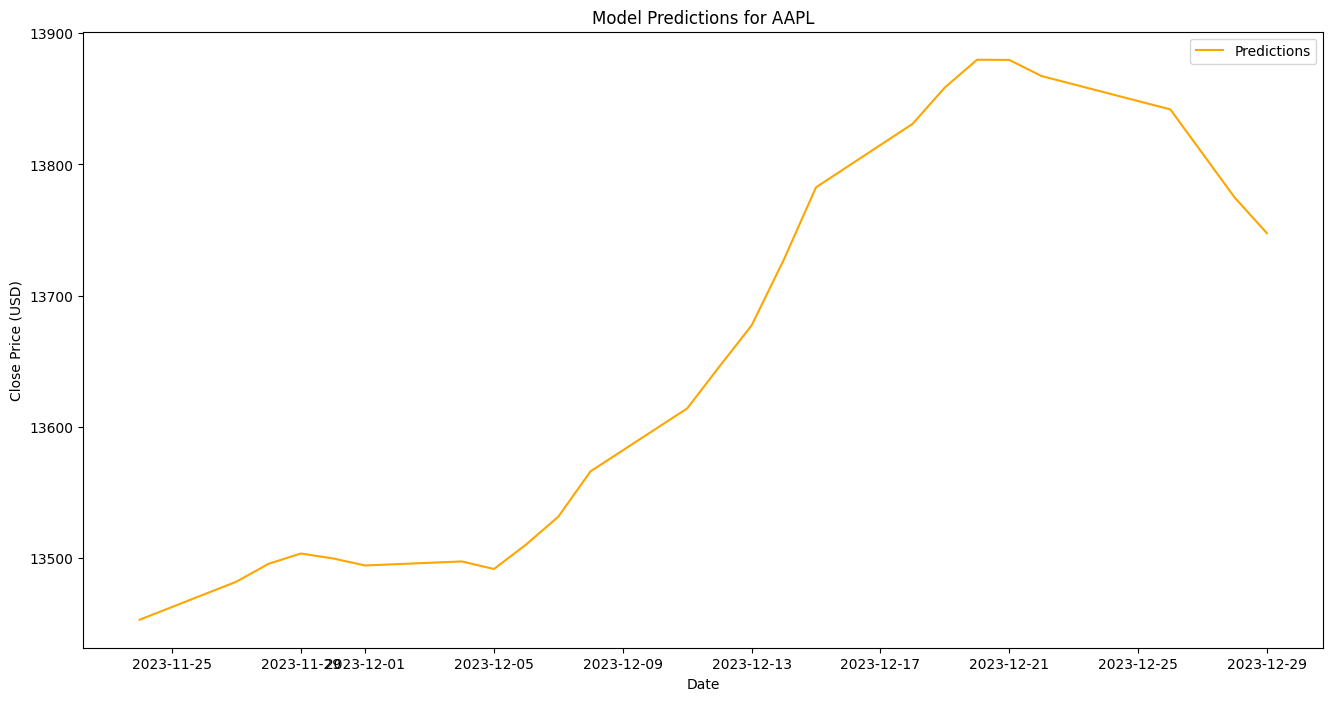

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 1s 825ms/step


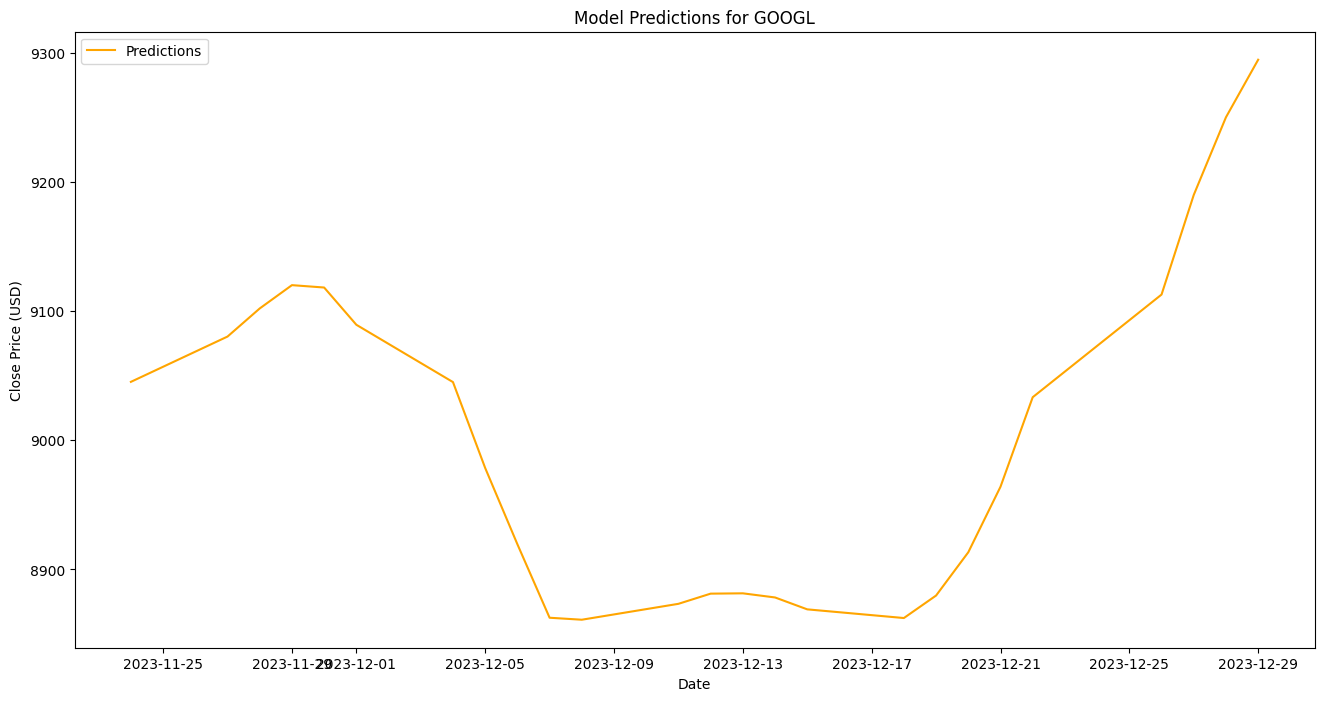

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 1s 839ms/step


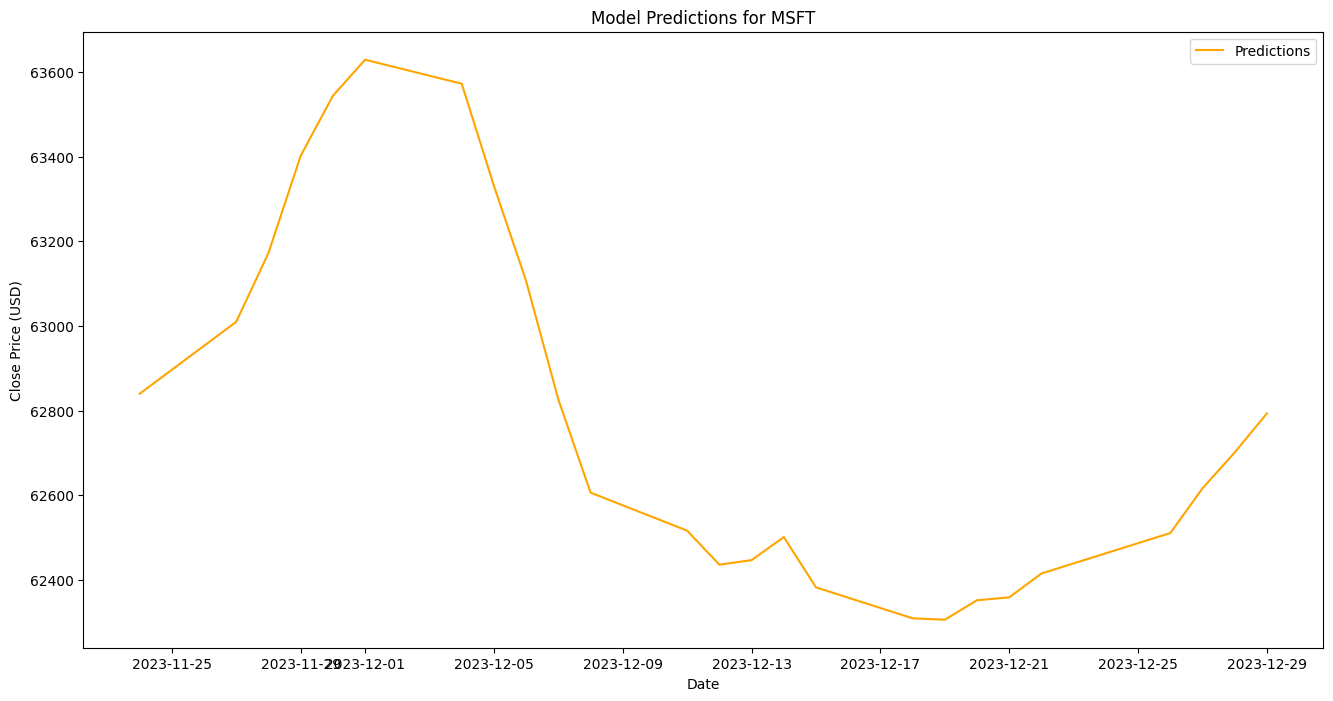

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 1s 836ms/step


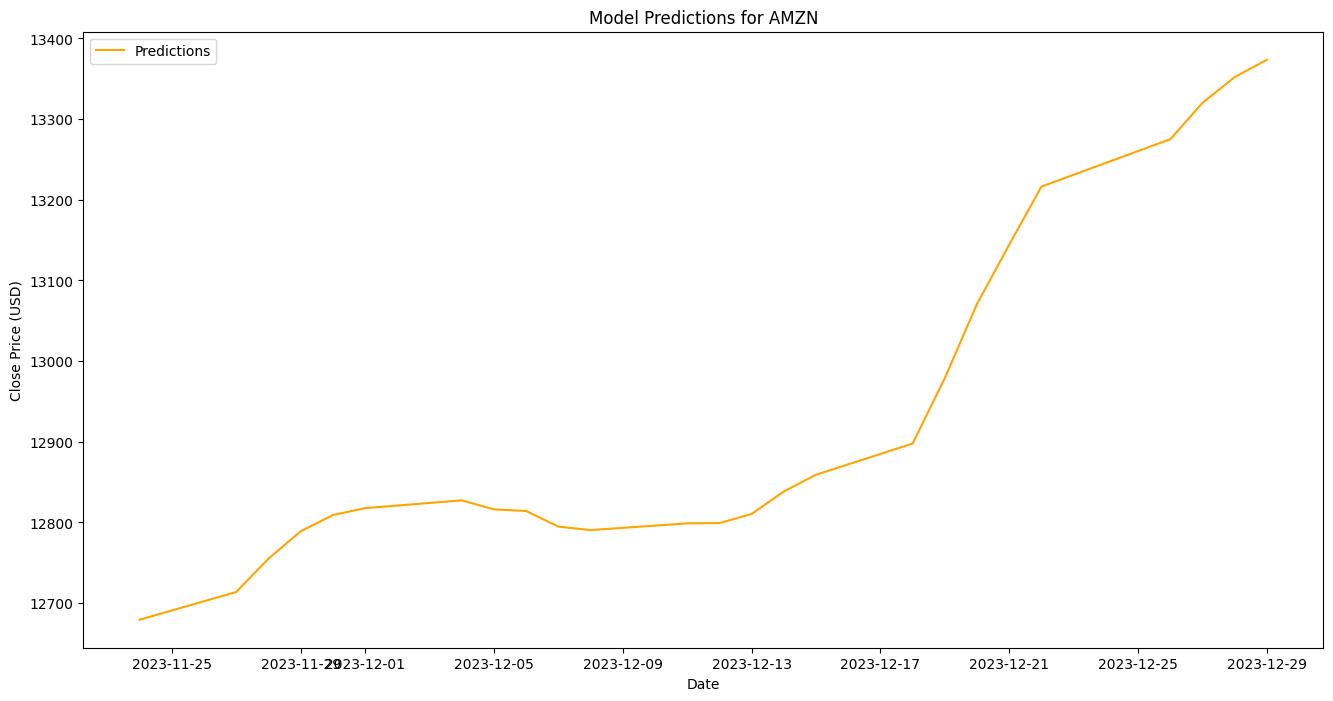

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 1s 843ms/step


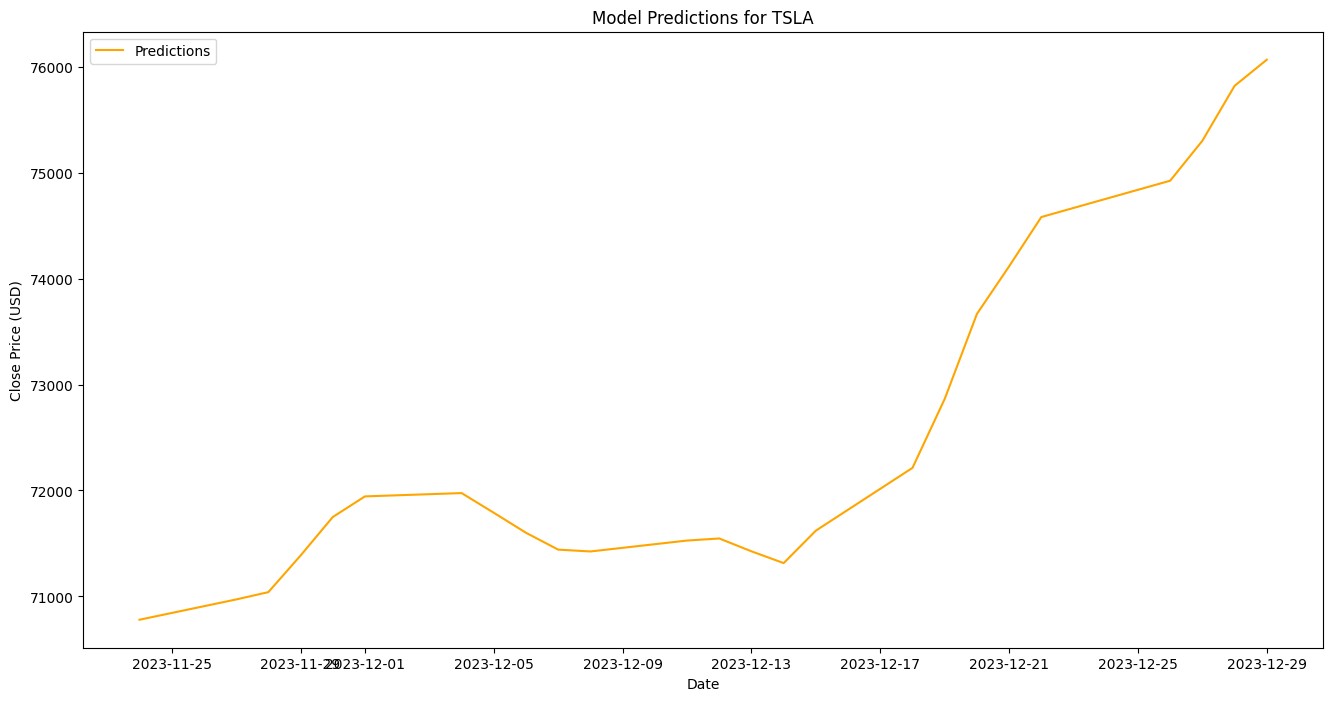

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 1s 949ms/step


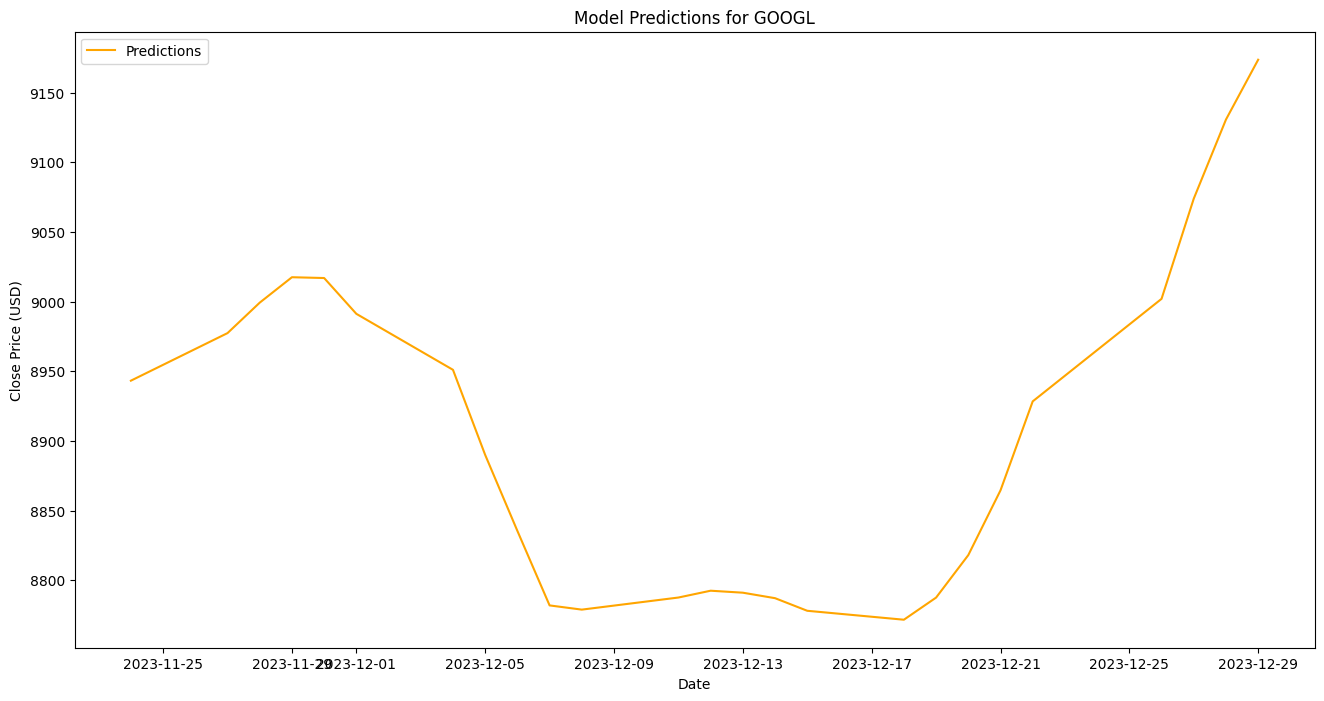

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Function to fetch historical data for a given ticker
def get_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Function to preprocess data for LSTM model
def preprocess_data(data):
    if len(data) == 0 or 'Close' not in data.columns:
        raise ValueError("Invalid data format. Ensure the data is not empty and contains 'Close' column.")

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    training_data_len = int(np.ceil(len(scaled_data) * .95))
    train_data = scaled_data[0:int(training_data_len), :]

    x_train, y_train = [], []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i - 60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train, y_train, scaler, scaled_data, training_data_len

# Function to create and train an LSTM model
def create_lstm_model(x_train):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Function to plot historical data, indications, and predictions
def plot_predictions(ticker, data, scaler, training_data_len, x_test, predictions):
    valid = pd.DataFrame(index=data.index[training_data_len:], columns=['Predictions'])
    valid['Predictions'] = scaler.inverse_transform(predictions)

    plt.figure(figsize=(16, 8))
    plt.title(f'Model Predictions for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.plot(valid['Predictions'], label='Predictions', color='orange')
    plt.legend()
    plt.show()

# Example usage
all_tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL']  # Add more tickers as needed
start_date = '2022-01-01'
end_date = '2024-01-01'

for ticker in all_tickers:
    data = get_historical_data(ticker, start_date, end_date)
    
    try:
        x_train, y_train, scaler, scaled_data, training_data_len = preprocess_data(data)
    except ValueError as e:
        print(f"Error processing data for {ticker}: {e}")
        continue

    model = create_lstm_model(x_train)

    model.fit(x_train, y_train, batch_size=1, epochs=1)

    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []

    for i in range(60, len(test_data)):
        x_test.append(test_data[i - 60:i, 0])

    x_test = np.array(x_test)

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    plot_predictions(ticker, data, scaler, training_data_len, x_test, predictions)


In [20]:
import yfinance as yf
from tabulate import tabulate

# Example tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL']

# Fetch live data
live_data = yf.download(tickers, period='1d')

# Display the live data as a table
print(tabulate(live_data, headers='keys', tablefmt='fancy_grid'))

[*********************100%%**********************]  5 of 5 completed

╒═════════════════════╤═════════════════════════╤═════════════════════════╤══════════════════════════╤═════════════════════════╤═════════════════════════╤═════════════════════╤═════════════════════╤══════════════════════╤═════════════════════╤═════════════════════╤════════════════════╤════════════════════╤═════════════════════╤════════════════════╤════════════════════╤═══════════════════╤═══════════════════╤════════════════════╤═══════════════════╤═══════════════════╤════════════════════╤════════════════════╤═════════════════════╤════════════════════╤════════════════════╤══════════════════════╤══════════════════════╤═══════════════════════╤══════════════════════╤══════════════════════╕
│ Date                │   ('Adj Close', 'AAPL') │   ('Adj Close', 'AMZN') │   ('Adj Close', 'GOOGL') │   ('Adj Close', 'MSFT') │   ('Adj Close', 'TSLA') │   ('Close', 'AAPL') │   ('Close', 'AMZN') │   ('Close', 'GOOGL') │   ('Close', 'MSFT') │   ('Close', 'TSLA') │   ('High', 'AAPL') │   ('High', 'AMZN')

In [15]:
pip install tabulate


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
